# Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Get the data ready
import pandas as pd
# Display the first few rows
df = pd.read_csv('Resources/IMDb Movies India.csv', encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check for missing values
print(df.isna().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [3]:
print(df.dtypes)

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


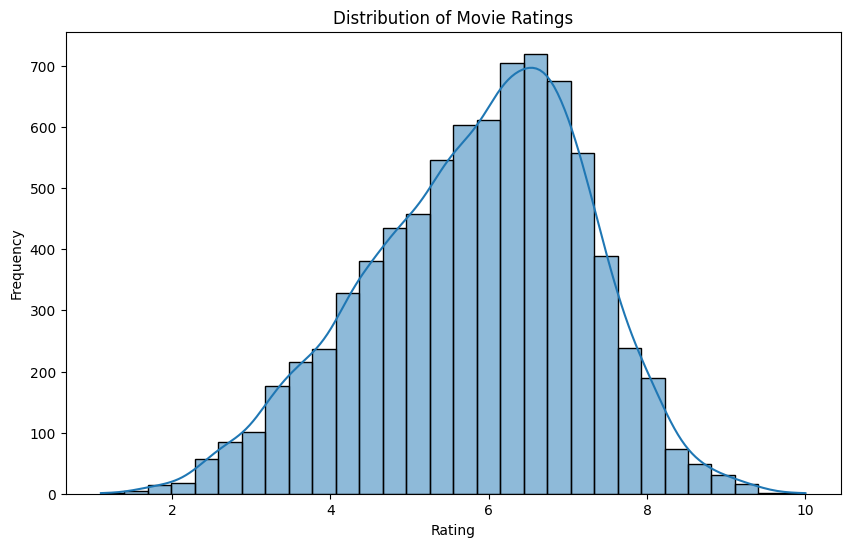

In [4]:
# Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [5]:
df2=df.groupby('Director')['Rating'].mean()
df2.head()

Director
A B Arjun              NaN
A. Bhimsingh      6.776471
A. Habib               NaN
A. Jagannathan    5.833333
A. Karim               NaN
Name: Rating, dtype: float64

In [6]:
drop_df=df.drop(['Year', 'Duration', 'Genre','Actor 1','Actor 2','Actor 3'],axis=1)
drop_df.head()

,Name,Rating,Votes,Director
0,,NaN,NaN,J.S. Randhawa
1,#Gadhvi (He thought he was Gandhi),7.0,8,Gaurav Bakshi
2,#Homecoming,NaN,NaN,Soumyajit Majumdar
3,#Yaaram,4.4,35,Ovais Khan
4,...And Once Again,NaN,NaN,Amol Palekar


In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sample DataFrame
drop_df= {'Name','Rating','Votes','Director'}
df = pd.DataFrame(drop_df)

# Convert 'Votes' to numeric
drop_df['Votes'] = pd.to_numeric(drop_df['Votes'])

# Define the ColumnTransformer with OneHotEncoder for 'Name' and 'Director'
preprocessor = ColumnTransformer(
    transformers=[
        ('name', OneHotEncoder(), ['Name']),
        ('director', OneHotEncoder(), ['Director'])
    ],
    remainder='passthrough'  # Keep 'Rating' and 'Votes' columns unchanged
)

# Apply the transformer
df_transformed = preprocessor.fit_transform(df)

# Convert the result back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())

print(df_transformed)

TypeError: 'set' object is not subscriptable

In [ ]:
dummies = pd.get_dummies(drop_df[['Rating','Votes','Director']])
dummies

In [ ]:
fill_df=drop_df.fillna(0)
fill_df.head()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sample DataFrame
fill_df = {
    'Name',
    'Rating',
    'Votes',
    'Director'
}
df = pd.DataFrame(fill_df)

# Convert 'Votes' to numeric
df['Votes'] = pd.to_numeric(df['Votes'])

# Define the ColumnTransformer with OneHotEncoder for 'Name' and 'Director'
preprocessor = ColumnTransformer(
    transformers=[
        ('name', OneHotEncoder(), ['Name']),
        ('director', OneHotEncoder(), ['Director'])
    ],
    remainder='passthrough'  # Keep 'Rating' and 'Votes' columns unchanged
)

# Apply the transformer
df_transformed = preprocessor.fit_transform(df)

# Convert the result back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=preprocessor.get_feature_names_out())

print(df_transformed)

In [ ]:
df_cat=fill_df.select_dtypes(exclude=['float64'])
df_cat

In [ ]:
df_cat.columns

In [ ]:
import warnings
warnings. filterwarnings('ignore')
df_cat=pd.get_dummies(df_cat, columns=['Name', 'Votes', 'Director'], drop_first=True)

In [ ]:
df_cat.head()

In [ ]:
drop_df.head()

In [ ]:
cols=list(df_cat.columns)
def cat_2_num(cols) :
    for col in cols:
        df_cat[col]=pd.get_dummies(df_cat[col], drop_first=True)
cat_2_num(cols)

In [ ]:
df_cat.describe()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression 

# Split into X/Y
x = df_cat.drop('Votes', axis=1)
y = df_cat['Votes']

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2, random_state=42)
model = LinearRegression()

# Let's refit the model
np.random.seed(42)
model.fit(x_train, y_train)

model.score(x_test, y_test)

In [ ]:
#To fix UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte, chardet library is used and the result dictionary will contain the detected encoding, which then used in the pd.read_csv function.
import chardet

# Detect the encoding
with open('Resources/IMDb Movies India.csv', 'rb') as file:
    result = chardet.detect(file.read())

print(result)


In [ ]:
# Get the data ready
import pandas as pd
encoding = result['encoding']
movie_data = pd.read_csv('Resources/IMDb Movies India.csv', encoding=encoding)
# Display the first few rows
movie_data

In [ ]:
# Check for missing values
print(movie_data.isna().sum())

In [ ]:
print(movie_data.dtypes)

In [ ]:
# Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(movie_data['Rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 4. Data Type Conversion
# Dropping Name column because it doesn't impact the outcome
movie_data.drop('Name',axis = 1)
movie_data.drop('Year',axis = 1)
movie_data.drop('Duration',axis = 1)

categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
one_hot = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer(transformers=[('one_hot',
                                               one_hot,
                                               categorical_features)],
                                               remainder='passthrough')
movie_data_transformed = transformer.fit_transform(movie_data)


In [ ]:
movies_data = movie_data.fillna(value = movie_data['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'].mean())

print(movies_data.isnull().sum())

In [ ]:

# 4. Data Type Conversion
# Dropping Name column because it doesn't impact the outcome
movie_data.drop('Name',axis = 1)
movie_data.drop('Year',axis = 1)
movie_data.drop('Duration',axis = 1)

# Grouping the columns with their average rating and then creating a new feature
genre_mean_rating = movie_data.groupby ('Genre' )['Rating'].transform('mean')
movie_data[ 'Genre_mean_rating'] = genre_mean_rating
director_mean_rating = movie_data.groupby ('Director' )['Rating']. transform('mean' )
movie_data[ 'Director_encoded'] = director_mean_rating
actor1_mean_rating = movie_data.groupby ('Actor 1')[ 'Rating']. transform('mean')
movie_data[ 'Actor1_encoded'] = actor1_mean_rating
actor2_mean_rating = movie_data.groupby('Actor 2')['Rating']. transform('mean' )
movie_data ['Actor2_encoded'] = actor2_mean_rating
actor3_mean_rating = movie_data.groupby('Actor 3')['Rating']. transform('mean')
movie_data['Actor3_encoded'] = actor3_mean_rating


In [ ]:
movie_data_cleaned = movie_data.copy()
# Filling missing values using the assign method
movie_data_cleaned = (movie_data_cleaned
                      .assign(Year=movie_data_cleaned['Year'].fillna(movie_data_cleaned['Year'].mode()[0]))
                      .assign(Duration=movie_data_cleaned['Duration'].fillna(movie_data_cleaned['Duration'].mode()[0]))
                      .assign(Genre=movie_data_cleaned['Genre'].fillna(movie_data_cleaned['Genre'].mode()[0]))
                      .assign(Rating=movie_data_cleaned['Rating'].fillna(movie_data_cleaned['Rating'].mean()))
                      .assign(Votes=movie_data_cleaned['Votes'].fillna(movie_data_cleaned['Votes'].mode()[0]))
                      .assign(Director=movie_data_cleaned['Director'].fillna(movie_data_cleaned['Director'].mode()[0]))
                      .assign(Actor_1=movie_data_cleaned['Actor 1'].fillna(movie_data_cleaned['Actor 1'].mode()[0]))
                      .assign(Actor_2=movie_data_cleaned['Actor 2'].fillna(movie_data_cleaned['Actor 2'].mode()[0]))
                      .assign(Actor_3=movie_data_cleaned['Actor 3'].fillna(movie_data_cleaned['Actor 3'].mode()[0])))

# Verifying missing values
print(movie_data_cleaned.isnull().sum())


In [ ]:
# One-hot encoding for categorical variables
movie_data_encoded = pd.get_dummies(movie_data_cleaned, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

# Displaying the first few rows of the encoded dataset
print(movie_data_encoded.head())


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = movie_data_encoded.drop(['Name', 'Rating'], axis=1)
y = movie_data_encoded['Rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)
